In [11]:
import sys
from pathlib import Path

# Get project root (parent of "notebooks" folder)
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]
DATA_DIR = PROJECT_ROOT / "data"

# Add project root to Python path
sys.path.append(str(PROJECT_ROOT))

print("Project Root:", PROJECT_ROOT)
print("Data Dir:", DATA_DIR)


Project Root: /home/cloudknight/dog-harness-size-predictor
Data Dir: /home/cloudknight/dog-harness-size-predictor/data


In [12]:
import pandas as pd
from config import RAW_DATA

# Load dataset
df = pd.read_csv(RAW_DATA)
df.head()


,Breed,Weight,Chest,Neck,BootSize,Age,Activity,HarnessSize
0,Boxer,28.8,70.8,42.2,6,64.0,High,L
1,Boxer,30.8,67.6,41.5,3,55.0,Medium,L
2,Poodle,23.0,53.2,37.5,6,69.0,High,M
3,Boxer,29.4,70.8,37.8,6,26.0,Medium,L
4,Beagle,11.5,48.4,39.3,1,NaN,High,S


In [13]:
# Inspecting the dataset
# Shape of dataset
print("Shape:", df.shape)

# Columns and data types
print(df.info())

# Quick stats (mean, min, max, etc.)
df.describe()


Shape: (10200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Breed        10200 non-null  object 
 1   Weight       9993 non-null   float64
 2   Chest        9998 non-null   float64
 3   Neck         9996 non-null   float64
 4   BootSize     10200 non-null  int64  
 5   Age          9998 non-null   float64
 6   Activity     10200 non-null  object 
 7   HarnessSize  10200 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 637.6+ KB
None


,Weight,Chest,Neck,BootSize,Age
count,9993.000000,9998.000000,9996.000000,10200.000000,9998.000000
mean,24.341869,62.358702,38.726120,3.971765,59.657932
std,17.031027,22.228761,9.458411,1.991793,34.447096
min,2.000000,25.000000,15.000000,1.000000,1.000000
25%,12.800000,47.300000,33.100000,2.000000,30.000000
50%,24.500000,65.000000,39.300000,4.000000,59.000000
75%,31.100000,74.600000,45.000000,6.000000,89.000000
max,281.000000,299.100000,60.000000,7.000000,120.000000


In [14]:
# Checking for missing values
df.isnull().sum()


Breed            0
Weight         207
Chest          202
Neck           204
BootSize         0
Age            202
Activity         0
HarnessSize      0
dtype: int64

In [15]:
# Previewing of unique values per column
for col in df.columns:
    print(f"\n{col}: {df[col].unique()[:10]}")  # show first 10 unique values



Breed: ['Boxer' 'Poodle' 'Beagle' 'Rottweiler' 'German Shepherd'
 'Golden Retriever' 'Dachshund' 'Bulldog' 'Chihuahua' 'Labrador']

Weight: [28.8 30.8 23.  29.4 11.5 11.9 53.5 58.8 27.6  nan]

Chest: [70.8 67.6 53.2 48.4 46.6 81.9 81.7 83.7 70.4 69.5]

Neck: [42.2 41.5 37.5 37.8 39.3 37.7 51.1 46.8 42.9 42.8]

BootSize: [6 3 1 7 4 5 2]

Age: [ 64.  55.  69.  26.  nan  54.  62. 102.  30.  22.]

Activity: ['High' 'Medium' 'Low' 'Unknown']

HarnessSize: ['L' 'M' 'S' 'XL' 'XS']


In [17]:
print(df.columns)


Index(['Breed', 'Weight', 'Chest', 'Neck', 'BootSize', 'Age', 'Activity',
       'HarnessSize'],
      dtype='object')


In [18]:
# Normalizing the column names to lowercas
df.columns = df.columns.str.strip().str.lower()
print(df.columns)


Index(['breed', 'weight', 'chest', 'neck', 'bootsize', 'age', 'activity',
       'harnesssize'],
      dtype='object')


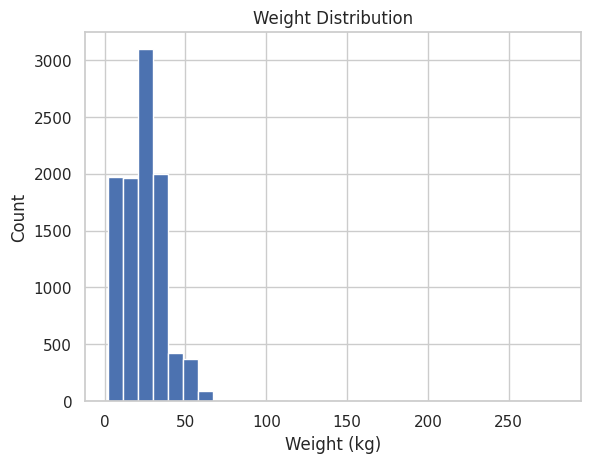

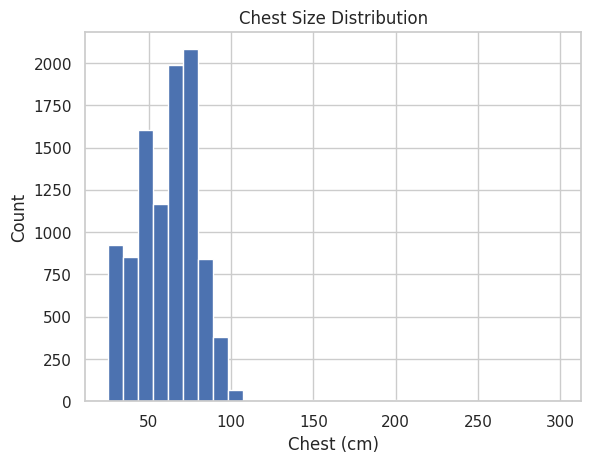

In [19]:
# Visualizing key features
import matplotlib.pyplot as plt

# Weight distribution
df['weight'].hist(bins=30)
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")   # optional for clarity
plt.ylabel("Count")
plt.show()

# Chest size distribution
df['chest'].hist(bins=30)
plt.title("Chest Size Distribution")
plt.xlabel("Chest (cm)")    # optional for clarity
plt.ylabel("Count")
plt.show()


In [20]:
# Importing and loading of data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config import RAW_DATA

# Load dataset
df = pd.read_csv(RAW_DATA)

# Quick peek
df.head()


,Breed,Weight,Chest,Neck,BootSize,Age,Activity,HarnessSize
0,Boxer,28.8,70.8,42.2,6,64.0,High,L
1,Boxer,30.8,67.6,41.5,3,55.0,Medium,L
2,Poodle,23.0,53.2,37.5,6,69.0,High,M
3,Boxer,29.4,70.8,37.8,6,26.0,Medium,L
4,Beagle,11.5,48.4,39.3,1,NaN,High,S


In [22]:
# Basic info
# Shape, datatypes, and summary
print(df.shape)
print(df.info())
print(df.describe())


(10200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Breed        10200 non-null  object 
 1   Weight       10200 non-null  float64
 2   Chest        10200 non-null  float64
 3   Neck         10200 non-null  float64
 4   BootSize     10200 non-null  int64  
 5   Age          10200 non-null  float64
 6   Activity     10200 non-null  object 
 7   HarnessSize  10200 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 637.6+ KB
None
             Weight         Chest          Neck      BootSize           Age
count  10200.000000  10200.000000  10200.000000  10200.000000  10200.000000
mean      24.345078     62.411010     38.737598      3.971765     59.644902
std       16.857324     22.010607      9.363685      1.991793     34.104386
min        2.000000     25.000000     15.000000      1.000000      1.000000
25%       12

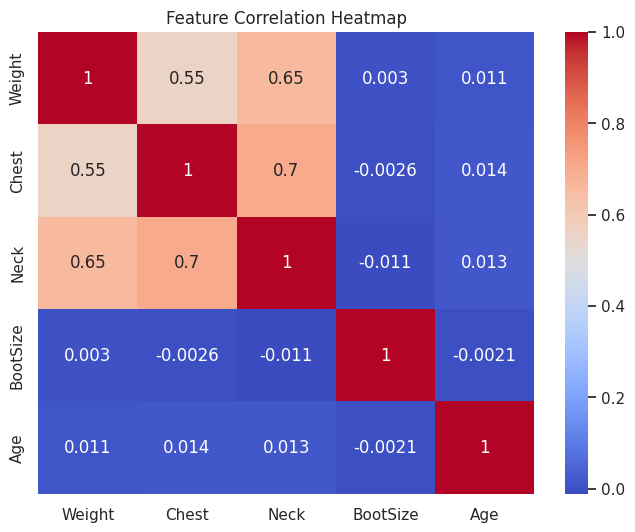

In [23]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


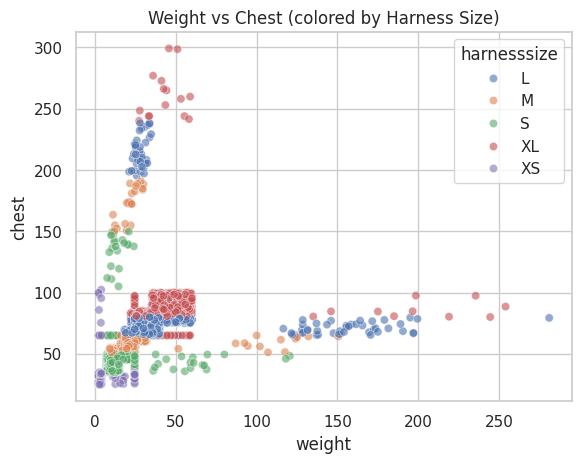

In [25]:
df.columns = df.columns.str.lower()

sns.scatterplot(x="weight", y="chest", data=df, hue="harnesssize", alpha=0.6)
plt.title("Weight vs Chest (colored by Harness Size)")
plt.show()


In [26]:
# Count missing values per column
df.isnull().sum()


breed          0
weight         0
chest          0
neck           0
bootsize       0
age            0
activity       0
harnesssize    0
dtype: int64

In [27]:
# Handling missing values
# Strategy: fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Double check
df.isnull().sum()


breed          0
weight         0
chest          0
neck           0
bootsize       0
age            0
activity       0
harnesssize    0
dtype: int64

In [28]:
# Normalize column names (all lowercase)
df.columns = [col.lower() for col in df.columns]
df.head()


,breed,weight,chest,neck,bootsize,age,activity,harnesssize
0,Boxer,28.8,70.8,42.2,6,64.0,High,L
1,Boxer,30.8,67.6,41.5,3,55.0,Medium,L
2,Poodle,23.0,53.2,37.5,6,69.0,High,M
3,Boxer,29.4,70.8,37.8,6,26.0,Medium,L
4,Beagle,11.5,48.4,39.3,1,59.0,High,S
